# Data Exploration using Spectogram visualizations

In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from scipy import signal

from data import Read_Data

In [2]:
gd = Read_Data.GestureData()
features = gd.compile_data(nfft=4096, overlap=0.5, brange=8, keras_format=False, plot_spectogram=True, baseline_format=False,
                          verbose=1)

Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping files
Skipping f

In [3]:
from ipywidgets import interact
def make_plot(idx):
    plt.pcolormesh(features[idx]['features'])
    plt.title(str(features[idx]['user'])+' '+features[idx]['name'])
    plt.show()
    
interact(make_plot,idx=(0,len(features)-1,1),__manual=True)

<function __main__.make_plot>

In [4]:
len(features)

1404

# Class distribution

In [5]:
x, y, user, input_shape, lab_enc = gd.compile_data(nfft=4096, overlap=0.5,
                                                   brange=16, keras_format=True,
                                                   plot_spectogram=False,
                                                   baseline_format=False)


Input shape:(1404, 70, 32, 1)

Labels shape:(1404, 1)
Number of classes:  21


In [6]:
temp_y = y.reshape(-1)

In [7]:
gesture_count=[]
for item in np.unique(user):
    idx = np.where(user==item)[0]
    y_user = temp_y[idx]
    gesture_count.append(np.bincount(y_user))

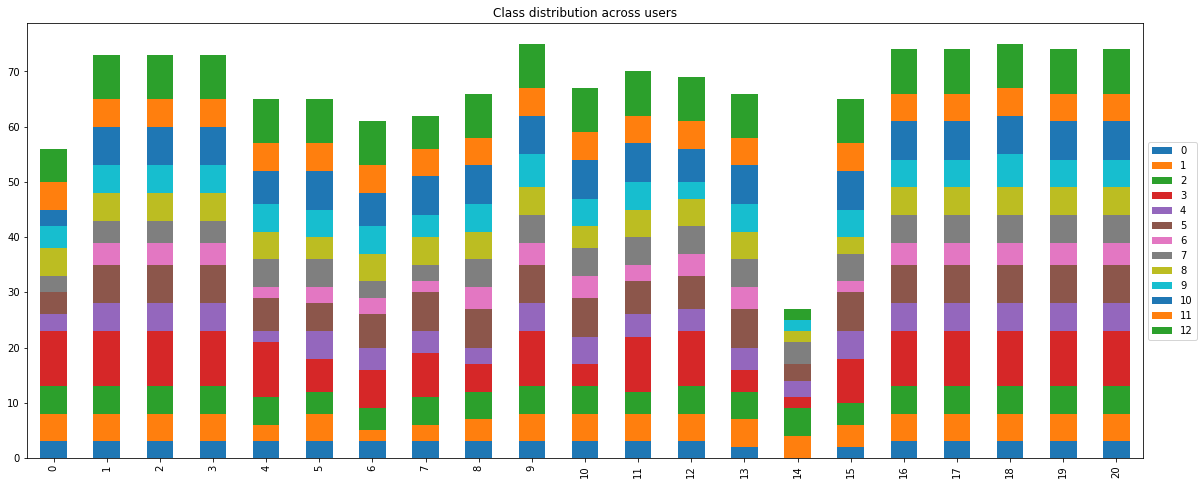

In [8]:
import pandas as pd
df = pd.DataFrame(gesture_count).T
df.plot(kind='bar', stacked=True, legend=False, figsize=(20, 8), title="Class distribution across users")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [9]:
np.max(gesture_count)/np.sum(gesture_count)

0.0071225071225071226

In [19]:
np.max(np.sum(gesture_count, axis=0)/np.sum(gesture_count))

0.053418803418803416

In [10]:
temp = pd.DataFrame(gesture_count)
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,3,3,3,3,3,3,3,3,3,3,...,3,3,2,0,2,3,3,3,3,3
1,5,5,5,5,3,5,2,3,4,5,...,5,5,5,4,4,5,5,5,5,5
2,5,5,5,5,5,4,4,5,5,5,...,4,5,5,5,4,5,5,5,5,5
3,10,10,10,10,10,6,7,8,5,10,...,10,10,4,2,8,10,10,10,10,10
4,3,5,5,5,2,5,4,4,3,5,...,4,4,4,3,5,5,5,5,5,5


In [11]:
temp.columns = lab_enc.classes_
np.sum(temp['slicel'])

27

In [30]:
from sklearn.model_selection import LeaveOneGroupOut, train_test_split

def strat_shuffle_split(x, y, split=0.3, random_state=12345):
    try:
        x_add_train, x_test, y_add_train, y_test = train_test_split(x,y,train_size=split, stratify=y)
    except ValueError:
        print("Stratified Shuffle split is not possible")
        x_add_train, x_test, y_add_train, y_test = train_test_split(x,y,train_size=split)
    return x_add_train, x_test, y_add_train, y_test

logo = LeaveOneGroupOut()
for train_idx, test_idx in logo.split(x, y, user):
    print("\nUser: ", user[test_idx[0]])
    x_train, y_train = x[train_idx, :, :, :], y[train_idx]
    x_test, y_test = x[test_idx, :, :, :], y[test_idx]
    print("Training: ", x_train.shape)
    print("Testing: ", x_test.shape)
    for j in range(2):
        print("Fold:", j)
        seed_gen = j * 200
        # Split user test data - 60% added to the training data set
        x_add, x_test_new, y_add, y_test_new = strat_shuffle_split(x_test, y_test, split=0.1, random_state=seed_gen)
        
        print(y_train.shape)
        print(y_add.shape)
        
        # Add additional training data to the original
        x_train = np.vstack((x_train, x_add))
        y_train = np.vstack((y_train, y_add))
        
        sort_idx = np.argsort(y_test_new.reshape(-1))
        x_test_new = x_test_new[sort_idx, :, :, :]
        y_test_new = y_test_new[sort_idx]
        
        print("New Training: ", x_train.shape)
        print("New Testing: ", x_test_new.shape)


User:  1
Training:  (1346, 70, 32, 1)
Testing:  (58, 70, 32, 1)
Fold: 0
Stratified Shuffle split is not possible
(1346, 1)
(5, 1)
New Training:  (1351, 70, 32, 1)
New Testing:  (53, 70, 32, 1)
Fold: 1
Stratified Shuffle split is not possible
(1351, 1)
(5, 1)
New Training:  (1356, 70, 32, 1)
New Testing:  (53, 70, 32, 1)

User:  2
Training:  (1309, 70, 32, 1)
Testing:  (95, 70, 32, 1)
Fold: 0
Stratified Shuffle split is not possible
(1309, 1)
(9, 1)
New Training:  (1318, 70, 32, 1)
New Testing:  (86, 70, 32, 1)
Fold: 1
Stratified Shuffle split is not possible
(1318, 1)
(9, 1)
New Training:  (1327, 70, 32, 1)
New Testing:  (86, 70, 32, 1)

User:  3
Training:  (1303, 70, 32, 1)
Testing:  (101, 70, 32, 1)
Fold: 0
Stratified Shuffle split is not possible
(1303, 1)
(10, 1)
New Training:  (1313, 70, 32, 1)
New Testing:  (91, 70, 32, 1)
Fold: 1
Stratified Shuffle split is not possible
(1313, 1)
(10, 1)
New Training:  (1323, 70, 32, 1)
New Testing:  (91, 70, 32, 1)

User:  4
Training:  (1230, 

In [37]:
a =np.array([1,2,3,4]).reshape((-1,1))
b = np.array([1,2,3,49,0]).reshape((-1,1))

In [38]:
np.vstack((a,b))

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 1],
       [ 2],
       [ 3],
       [49],
       [ 0]])